# Mining-Twitter
This is copied from [andersy005/Mining-Twitter](https://github.com/andersy005/Mining-Twitter/blob/master/Mining-Twitter.ipynb)

Successfully installed twitter-1.18.0

# OAuth authorization credentials

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [11]:
import twitter
import json

In [6]:
results = []
with open('twitter oath.txt') as inputfile:
    for line in inputfile:
        results.append(line.strip().split(','))

In [31]:
CONSUMER_KEY  = results[0][0]
CONSUMER_SECRET = results[1][0]
OAUTH_TOKEN = results[2][0]
OAUTH_TOKEN_SECRET = results[3][0]

In [32]:
auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                            CONSUMER_KEY, CONSUMER_SECRET)
twitter_api = twitter.Twitter(auth = auth)
print(twitter_api)

# Retrieving trends

In [20]:
WORLD_WOE_ID = 1
US_WOE_ID = 23424977
UK_WOE_ID =  23424975
FR_WOE_ID = 23424819

In [33]:
world_trends = twitter_api.trends.place(_id = WORLD_WOE_ID)
fr_trends = twitter_api.trends.place(_id = FR_WOE_ID)
us_trends = twitter_api.trends.place(_id = US_WOE_ID)
uk_trends = twitter_api.trends.place(_id = UK_WOE_ID)

In [29]:
print(json.dumps(world_trends, indent=1))
print(json.dumps(fr_trends, indent=1))
print(json.dumps(us_trends, indent=1))
print(json.dumps(uk_trends, indent=1))

[
 {
  "trends": [
   {
    "name": "Happy 4th of July",
    "url": "http://twitter.com/search?q=%22Happy+4th+of+July%22",
    "promoted_content": null,
    "query": "%22Happy+4th+of+July%22",
    "tweet_volume": 583099
   },
   {
    "name": "#30Ya\u015f\u00dcst\u00fcTwitterdanDefolsun",
    "url": "http://twitter.com/search?q=%2330Ya%C5%9F%C3%9Cst%C3%BCTwitterdanDefolsun",
    "promoted_content": null,
    "query": "%2330Ya%C5%9F%C3%9Cst%C3%BCTwitterdanDefolsun",
    "tweet_volume": null
   },
   {
    "name": "Joey Chestnut",
    "url": "http://twitter.com/search?q=%22Joey+Chestnut%22",
    "promoted_content": null,
    "query": "%22Joey+Chestnut%22",
    "tweet_volume": 26159
   },
   {
    "name": "#\u0643\u0641\u0648_\u0646\u0627\u062f\u0643",
    "url": "http://twitter.com/search?q=%23%D9%83%D9%81%D9%88_%D9%86%D8%A7%D8%AF%D9%83",
    "promoted_content": null,
    "query": "%23%D9%83%D9%81%D9%88_%D9%86%D8%A7%D8%AF%D9%83",
    "tweet_volume": null
   },
   {
    "name": "#UnidadDe

# Computing the intersection of two sets of trends

In [10]:
world_trends_set = set([trend['name']
                       for trend in world_trends[0]['trends']])
fr_trends_set = set([trend['name']
                    for trend in fr_trends[0]['trends']])
us_trends_set = set([trend['name']
                    for trend in us_trends[0]['trends']])
uk_trends_set = set([trend['name']
                    for trend in uk_trends[0]['trends']])
common_trends = world_trends_set.intersection(fr_trends_set)
uk_us_common_trends = uk_trends_set.intersection(us_trends_set)
print(common_trends)
print(uk_us_common_trends)

{'Anthony Davis', 'Warriors'}
{'Warriors'}


# Searching for tweets

In [56]:
# collecting search results
q ='#BELJPN'
count = 100  # results_per_page

search_results = twitter_api.search.tweets(q=q, count=count)

statuses = search_results['statuses']

In [57]:
# iterate through 10 more batches of results by following the cursor
for _ in range(10):
    print("Length of statuses", len(statuses))
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError as e: # No more results when next_results doesn't exist
        break
        
    # create a dict from next_results, which has the following form:
    # ?max_id=32155486654&q=NAA&include_entities=1
    kwargs = dict([kv.split('=') for kv in next_results[1:].split("&")])
    
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']
    
# show one sample search result by slicing the list

print(json.dumps(statuses[0], indent=1))

Length of statuses 100
Length of statuses 200
Length of statuses 247
{
 "created_at": "Tue Jul 03 04:50:15 +0000 2018",
 "id": 1014008394586284032,
 "id_str": "1014008394586284032",
 "text": "RT @WorIdCupUpdates: Japan fans believe they can do it!\n\n#JPN #WorldCup #BELJPN https://t.co/SIeAUYro1Y",
 "truncated": false,
 "entities": {
  "hashtags": [
   {
    "text": "JPN",
    "indices": [
     57,
     61
    ]
   },
   {
    "text": "WorldCup",
    "indices": [
     62,
     71
    ]
   },
   {
    "text": "BELJPN",
    "indices": [
     72,
     79
    ]
   }
  ],
  "symbols": [],
  "user_mentions": [
   {
    "screen_name": "WorIdCupUpdates",
    "name": "FIFA World Cup",
    "id": 1689143826,
    "id_str": "1689143826",
    "indices": [
     3,
     19
    ]
   }
  ],
  "urls": [],
  "media": [
   {
    "id": 1013858542682607617,
    "id_str": "1013858542682607617",
    "indices": [
     80,
     103
    ],
    "media_url": "http://pbs.twimg.com/media/DhHy-REXkAESf2w.jpg",
    "me

# Extracting Tweet Entities

In [21]:
# Extracting text, screen names, and hashtags from tweets
status_texts = [ status['text'] for status in statuses]

screen_names = [ user_mention['screen_name'] 
               for status in statuses
                   for user_mention in status['entities']['user_mentions']]
hashtags = [ hashtag['text'] 
           for status in statuses
               for hashtag in status['entities']['hashtags']]

In [22]:
# compute a collection of all words from all tweets# compute 
words = [w
            for t in status_texts
                for w in t.split()]

In [23]:
# Explore the first 5 items for each
print(json.dumps(status_texts[0:5], indent=1))
print(json.dumps(screen_names[0:5], indent=1))
print(json.dumps(hashtags[0:5], indent=1))
print(json.dumps(words[0:5], indent=1))

[
 "RT @graphicalcomic: Today is a day when Japan made Asian football proud.\n\nSome times results don't depict right picture !!\n\n#BELJPN https:/\u2026",
 "#BELJPN #BRAMEX #LoveIsland #Croden #Wimbledon\nRoberto Martinez Courtois Lukaku Hazard Fellaini #herdsa18\nThai Warr\u2026 https://t.co/EIYA4X3p20",
 "@BelgiuminIsrael @FIFAWorldCup @BelRedDevils @BelgiumMFA @Fanclub1895 @PEDeBauw @BelgiumEmbJapan @MonarchieBe\u2026 https://t.co/WU3gVdV4fk",
 "RT @Jokunle: Retweet for hazard. Like for Neymar  #BELJPN https://t.co/1nKBHJTAUp",
 "RT @9GAGFootball: This is one of the most cleanest games so far this in this #WorldCup, no fouls, no cards, no divings, no VAR drama, just\u2026"
]
[
 "graphicalcomic",
 "BelgiuminIsrael",
 "FIFAWorldCup",
 "BelRedDevils",
 "BelgiumMFA"
]
[
 "BELJPN",
 "BELJPN",
 "BRAMEX",
 "LoveIsland",
 "Croden"
]
[
 "RT",
 "@graphicalcomic:",
 "Today",
 "is",
 "a"
]


# Analyzing Tweets and Tweet Entities with Frequency Analysis

In [24]:
from collections import Counter

In [25]:
# creating a basic frequency distribution from the words in tweets

for item in [words, screen_names, hashtags]:
    c = Counter(item)
    print(c.most_common()[:10]) # top 10
    print

[('RT', 180), ('#BELJPN', 127), ('the', 117), ('of', 79), ('for', 70), ('to', 52), ('no', 49), ('#WorldCup', 45), ('in', 40), ('or', 40)]
[('FIFAWorldCup', 17), ('BelRedDevils', 12), ('MohammadKaif', 10), ('9GAGFootball', 9), ('SMignolet', 8), ('NChadli', 7), ('Budweiser', 6), ('BelgiumEmbJapan', 5), ('Real_Casuals_66', 5), ('globaltimesnews', 5)]
[('BELJPN', 133), ('WorldCup', 54), ('TENDER', 22), ('BRAMEX', 17), ('JPN', 17), ('BEL', 17), ('LoveIsland', 10), ('Croden', 10), ('Wimbledon', 10), ('herdsa18', 10)]


In [54]:
# using prettytable to display tuples in a nice tabular format
from prettytable import PrettyTable

for label, data in (('Word', words),
                   ('Screen Name', screen_names),
                   ('Hashtag', hashtags)):
    pt = PrettyTable(field_names=[label, 'Count'])
    c = Counter(data)
    [pt.add_row(kv) for kv in c.most_common()[:10]]
    pt.align[label], pt.align['Count'] = 'l', 'r' # set column alignment
    print(pt)

+-----------+-------+
| Word      | Count |
+-----------+-------+
| RT        |   180 |
| #BELJPN   |   127 |
| the       |   117 |
| of        |    79 |
| for       |    70 |
| to        |    52 |
| no        |    49 |
| #WorldCup |    45 |
| in        |    40 |
| or        |    40 |
+-----------+-------+
+-----------------+-------+
| Screen Name     | Count |
+-----------------+-------+
| FIFAWorldCup    |    17 |
| BelRedDevils    |    12 |
| MohammadKaif    |    10 |
| 9GAGFootball    |     9 |
| SMignolet       |     8 |
| NChadli         |     7 |
| Budweiser       |     6 |
| BelgiumEmbJapan |     5 |
| Real_Casuals_66 |     5 |
| globaltimesnews |     5 |
+-----------------+-------+
+------------+-------+
| Hashtag    | Count |
+------------+-------+
| BELJPN     |   133 |
| WorldCup   |    54 |
| TENDER     |    22 |
| BRAMEX     |    17 |
| JPN        |    17 |
| BEL        |    17 |
| LoveIsland |    10 |
| Croden     |    10 |
| Wimbledon  |    10 |
| herdsa18   |    10 |
+

# Calculating lexical diversity for tweets

**Lexical diversity** is a measure of how many different words that are used in a text, while lexical density provides a measure of the proportion of lexical items (i.e. nouns, verbs, adjectives and some adverbs) in the text.

In [29]:
# compute lexical diversity# compute 
def lexical_diversity(tokens):
    return 1.0 * len(set(tokens)) / len(tokens)

In [30]:
# compute the average number of words per tweet
def average_words(statuses):
    total_words = sum([len(s.split()) for s in statuses])
    return 1.0 * total_words / len(statuses)
print(lexical_diversity(words))
print(lexical_diversity(screen_names))
print(lexical_diversity(hashtags))
print(average_words(status_texts))

0.31621805021488353
0.4889867841409692
0.15776699029126215
17.8987854251


- The lexical diversity of the words in the text of the tweets is around 0.316. One way to interpret that figure would be to say that about two out of every five words is unique, or you might say that each status update carries around 40% unique information. Given that the average number of words in each tweet is around 13, that translates to about five unique words per tweet.
- The lexical diversity of the screen names, however, is even higher, with a value of 0.489, which means that about 4.9 out of 10 screen names mentioned are unique. This observation also makes sense given that many answers to the question will be a screen name, and that most people won’t be providing the same responses for the solicitous hashtag.
- The lexical diversity of the hashtags is low at a value of around 0.382, implying that very few values other than the #God hashtag appear multiple times in the results. Again, this makes good sense given that most responses are short.
- The average number of words per tweet is very low at a value of just under 13, which makes sense given the nature of the hashtag, which is designed to solicit short responses consisting of just a few words.

# Examining Patterns in Retweets

In [38]:
# Finding the most popular retweets# Finding 
retweets = [
                # store out a tuple of these three values
                (status['retweet_count'],
                 status['retweeted_status']['user']['screen_name'],
                 status['text'])
    
                # for each status
                for status in statuses
    
                # so long as the status meets this condition.
                if 'retweeted_status' in status
            ]

# slice off the first 5 from the sorted results and display each item in the tuple

pt = PrettyTable(field_names=['Count', 'Screen  Name', 'Text'])
[pt.add_row(row) for row in sorted(retweets, reverse=True)[:50]]
pt.max_width['Text'] = 40
pt.align='l'
print(pt)

+-------+-----------------+------------------------------------------+
| Count | Screen  Name    | Text                                     |
+-------+-----------------+------------------------------------------+
| 7243  | FIFAWorldCup    | RT @FIFAWorldCup: That second half.      |
|       |                 | Incredible.                              |
|       |                 |                                          |
|       |                 | It is #BEL who will face #BRA in the     |
|       |                 | quarter-finals!                          |
|       |                 |                                          |
|       |                 | #BELJPN https://t.co/CCnvXROiKu          |
| 7243  | FIFAWorldCup    | RT @FIFAWorldCup: That second half.      |
|       |                 | Incredible.                              |
|       |                 |                                          |
|       |                 | It is #BEL who will face #BRA in the     |
|     

In [40]:
# Looking up users who have retweeted a status# Looking 
# Get the original tweet id for a tweet from its retweeted_status node

_retweets = twitter_api.statuses.retweets(id=754623311905169408)
print([r['user']['screen_name'] for r in _retweets])

[]


# Visualizing Frequency Data with Histograms

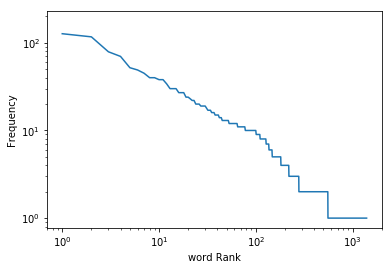

In [41]:
# Plotting frequencies of words
word_counts = sorted(Counter(words).values(), reverse=True)

plt.loglog(word_counts)
plt.ylabel("Frequency")
plt.xlabel("word Rank")
None

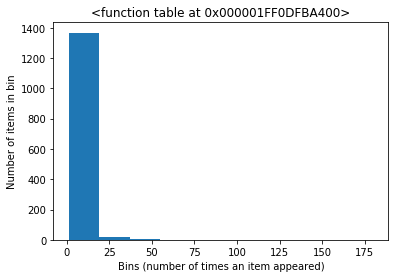

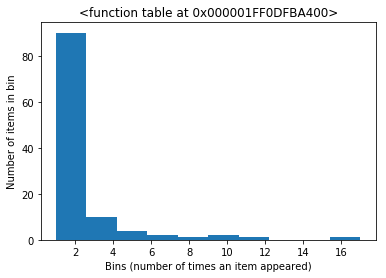

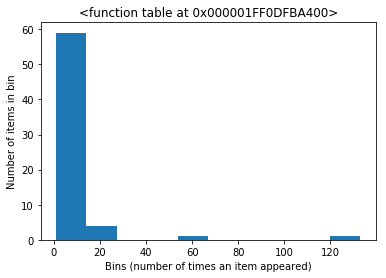

In [42]:
# Generating histograms of words, screen names, and hashtags# Generat 
for label, data in (('Words', words),
                    ('Screen Names', screen_names),
                    ('Hashtags', hashtags)):
    # Build a frequency map for each set of data and plot the values
    c = Counter(data)
    plt.hist(c.values())
    
    plt.title(table)
    plt.ylabel("Number of items in bin")
    plt.xlabel("Bins (number of times an item appeared)")
    
    plt.figure()

[773, 2456, 2004, 12, 2580, 2004, 14, 15, 1, 824, 1149, 7, 157, 2004, 801, 811, 166, 79, 63, 360, 108, 3, 455, 16, 142, 409, 14, 79, 227, 15, 157, 824, 322, 31, 98, 1948, 96, 502, 1150, 157, 2004, 9, 331, 2738, 410, 1198, 15, 1070, 2315, 16, 2004, 25, 1576, 7243, 4650, 3082, 6, 3082, 2, 190, 8, 3, 161, 227, 189, 1247, 1213, 418, 364, 811, 4650, 1, 4650, 2004, 190, 157, 2, 410, 5, 29, 19, 8, 53, 63, 67, 53, 459, 54, 410, 21, 139, 396, 410, 12, 1070, 63, 4650, 3, 79, 339, 2609, 364, 15, 1150, 1948, 710, 410, 1, 1, 311, 2456, 35, 103, 67, 519, 410, 12, 117, 4650, 7243, 4, 455, 339, 295, 4650, 63, 3, 331, 227, 2456, 20, 455, 4650, 710, 1247, 7243, 6, 2004, 188, 2609, 3082, 40, 8, 418, 2315, 824, 2004, 410, 4, 1948, 18, 30, 11, 2004, 33, 1875, 339, 1383, 824, 2456, 3, 1, 455, 189, 157, 4650, 824, 410, 227, 1, 17, 2580, 2738, 1494, 110, 773, 31, 410, 1, 1]


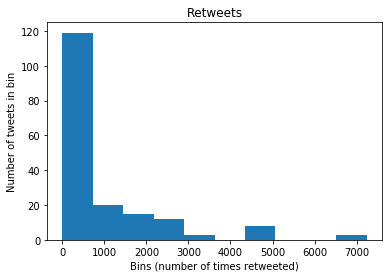

In [43]:
# Generating a hsistogram of retweet counts
# using underscores while unpacking values in 
# a tuple is idiomatic for discarding them

counts = [count for count,_,_ in retweets]

plt.hist(counts)
plt.title("Retweets")
plt.xlabel("Bins (number of times retweeted)")
plt.ylabel("Number of tweets in bin")

print(counts)